# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import sys

# Replace '/path/to/your/module/' with the path to the directory containing config.py
module_path = '/Users/cmdur/OneDrive/Desktop/analytics_classwork/python-api-challenge/'

# Add the directory containing config.py to sys.path
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
# Define an empty list to fetch the weather data for each city
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | saipan
Processing Record 3 of Set 1 | ingersoll
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | gadzhiyevo
Processing Record 7 of Set 1 | bel ombre
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | alaghsas
Processing Record 11 of Set 1 | yazman
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | barcelos
Processing Record 14 of Set 1 | muisne
Processing Record 15 of Set 1 | novyy urgal
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | tazacorte
Processing Record 18 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | labuan lombok
City not found. Skipping...
Processing Record 21 of Set 1 | edinburgh of the 

In [38]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,37.09,62,8,7.38,GS,1712413556
1,saipan,15.1355,145.7010,79.50,89,40,11.50,MP,1712413366
2,ingersoll,43.0334,-80.8830,43.97,75,100,13.89,CA,1712413416
3,yellowknife,62.4560,-114.3525,23.41,90,0,4.61,CA,1712413559
4,port-aux-francais,-49.3500,70.2167,48.24,95,99,31.74,TF,1712413560


In [40]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [41]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,37.09,62,8,7.38,GS,1712413556
1,saipan,15.1355,145.7010,79.50,89,40,11.50,MP,1712413366
2,ingersoll,43.0334,-80.8830,43.97,75,100,13.89,CA,1712413416
3,yellowknife,62.4560,-114.3525,23.41,90,0,4.61,CA,1712413559
4,port-aux-francais,-49.3500,70.2167,48.24,95,99,31.74,TF,1712413560


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

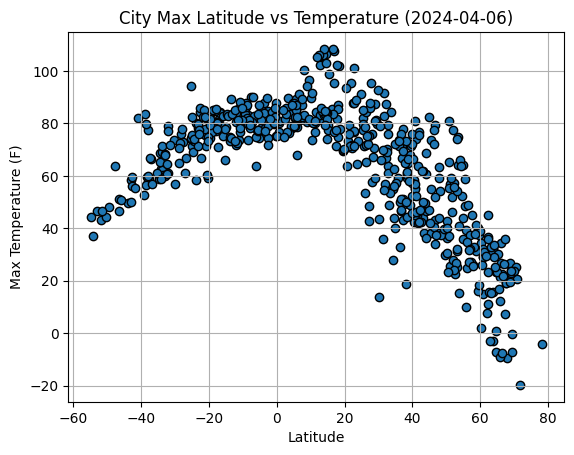

In [42]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

plt.scatter(x, y, edgecolor = 'black')
plt.title(f'City Max Latitude vs Temperature ({time.strftime("%Y-%m-%d")})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

In [50]:
def scatter_fig(x,y,fig_id,x_label,y_label,fig_title):
    plt.scatter(x, y, edgecolor = 'black')
    plt.grid(True)
    plt.title(fig_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"../output_data/Fig{fig_id}.png")
    plt.show()

#### Latitude Vs. Humidity

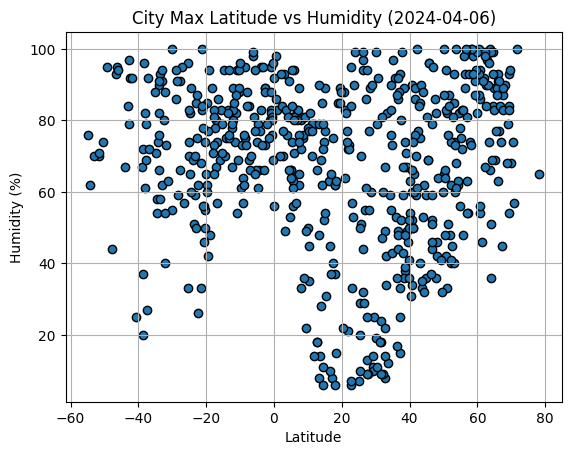

In [54]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
# Save the figure
# Show plot

x = city_data_df["Lat"]
y = city_data_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity (%)"
fig_id = 2
fig_title = f'City Max Latitude vs Humidity ({time.strftime("%Y-%m-%d")})'
scatter_fig(x,y,fig_id,x_label,y_label,fig_title)

#### Latitude Vs. Cloudiness

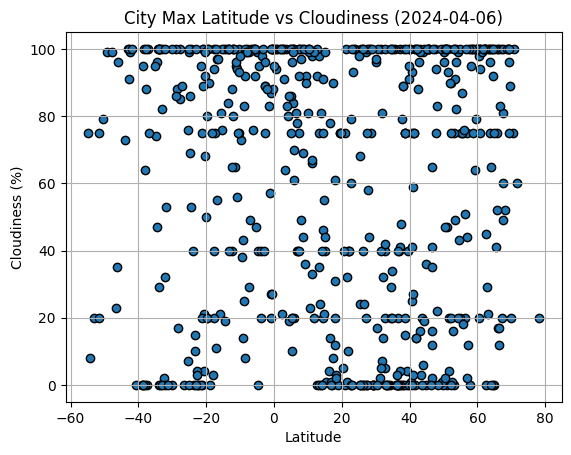

In [55]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
# Save the figure
# Show plot

x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness (%)"
fig_id = 3
fig_title = f'City Max Latitude vs Cloudiness ({time.strftime("%Y-%m-%d")})'
scatter_fig(x,y,fig_id,x_label,y_label,fig_title)

#### Latitude vs. Wind Speed Plot

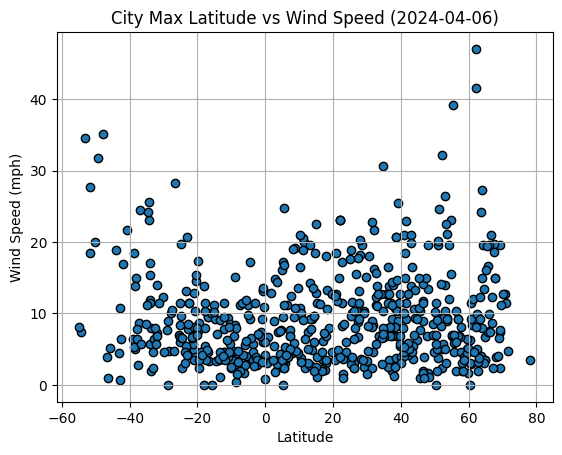

In [58]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
# Save the figure
# Show plot

x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed (mph)"
fig_id = 4
fig_title = f'City Max Latitude vs Wind Speed ({time.strftime("%Y-%m-%d")})'
scatter_fig(x,y,fig_id,x_label,y_label,fig_title)

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: -0.5884270243183941


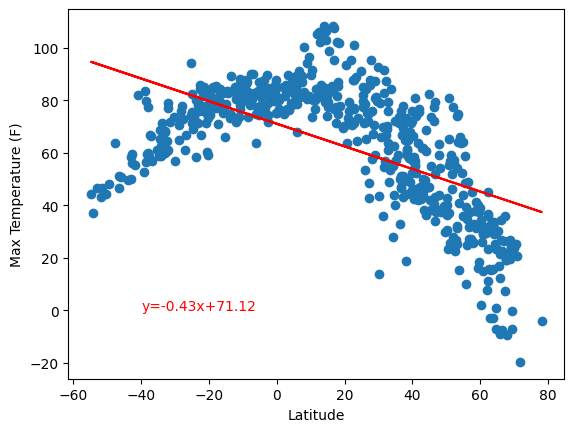

In [82]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature (F)"
x_text = -40
y_text = 0
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
def linear_fig(slope,x,intercept,rvalue,y,x_label,y_label,x_text,y_text):
    y_pred = slope*x + intercept
    plt.scatter(x,y)
    plt.plot(x, y_pred,color='r')
    plt.text(x_text,y_text,f'y={round(slope,2)}x+{round(intercept,2)}',color='r',fontsize=10)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f'The r-value is: {rvalue}')
    plt.show()
linear_fig(slope,x_values,intercept,rvalue,y_values,x_label,y_label,x_text,y_text)

In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saipan,15.1355,145.7010,79.50,89,40,11.50,MP,1712413366
2,ingersoll,43.0334,-80.8830,43.97,75,100,13.89,CA,1712413416
3,yellowknife,62.4560,-114.3525,23.41,90,0,4.61,CA,1712413559
5,gadzhiyevo,69.2551,33.3362,24.10,84,100,7.36,RU,1712413561
7,albany,42.6001,-73.9662,42.58,77,88,5.01,US,1712413265


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,37.09,62,8,7.38,GS,1712413556
4,port-aux-francais,-49.3500,70.2167,48.24,95,99,31.74,TF,1712413560
6,bel ombre,-4.6167,55.4167,85.84,79,40,9.22,SC,1712413562
15,port mathurin,-19.6833,63.4167,80.33,85,20,17.40,MU,1712413572
17,puerto natales,-51.7236,-72.4875,43.25,70,75,27.63,CL,1712413575


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8409448750353613


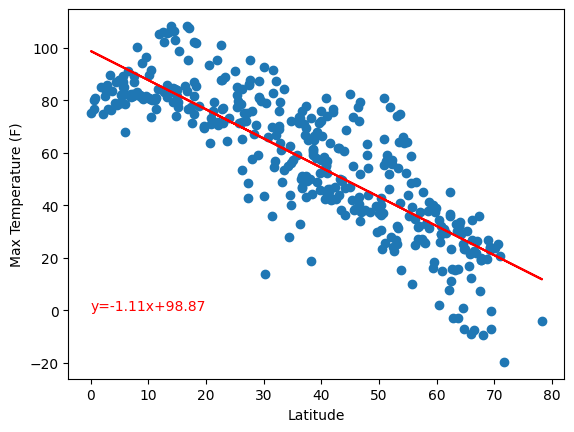

In [83]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature (F)"
x_text = 0
y_text = 0
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linear_fig(slope,x_values,intercept,rvalue,y_values,x_label,y_label,x_text,y_text)

The r-value is: 0.7739925080256284


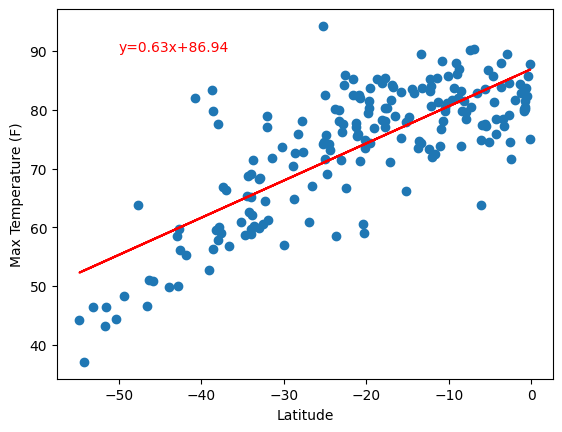

In [85]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature (F)"
x_text = -50
y_text = 90
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linear_fig(slope,x_values,intercept,rvalue,y_values,x_label,y_label,x_text,y_text)

**Discussion about the linear relationship:** There are good correlations between the latitude and maximum temperatures for the northern and southern hemispheres. For the northern hemisphere there is a negative correlation with an r-value of 0.84; this shows that as the latitude increases from the equator, there is a predicted decrease in maximum temperature. Similarly, for the southern hermisphere there is a positive correlation of 0.77; this shows that as the latitude approaches the equator, there is a predicted increase in maximum temperature. Both of the linear regressions can be used to predict maximum temperatures as a function of latitudes.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2139632423468355


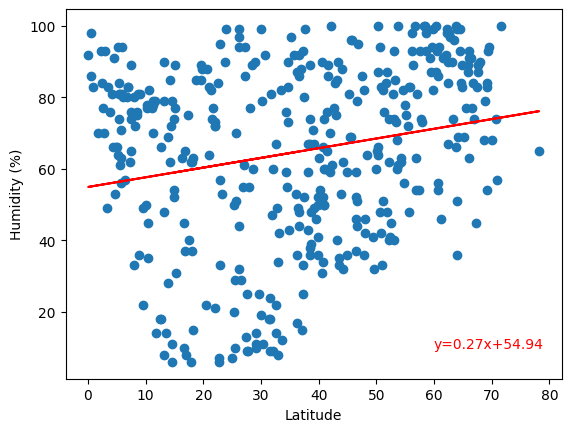

In [88]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity (%)"
x_text = 60
y_text = 10
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linear_fig(slope,x_values,intercept,rvalue,y_values,x_label,y_label,x_text,y_text)

The r-value is: 0.14471229175328637


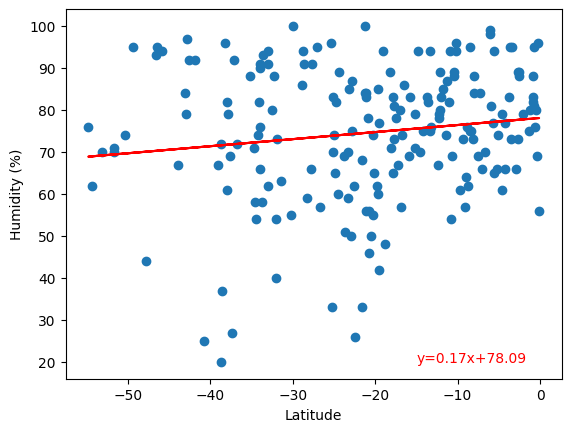

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity (%)"
x_text = -15
y_text = 20
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linear_fig(slope,x_values,intercept,rvalue,y_values,x_label,y_label,x_text,y_text)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.057076337195438476


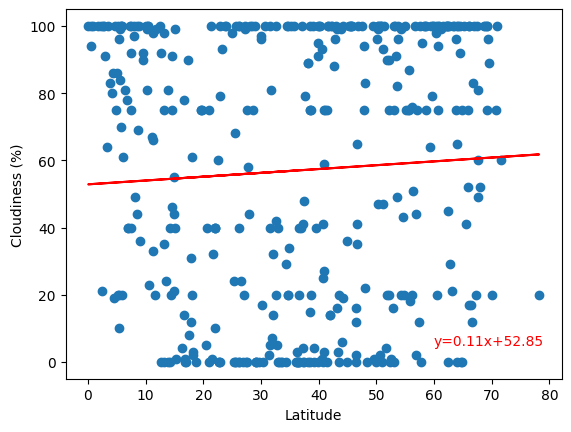

In [92]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness (%)"
x_text = 60
y_text = 5
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linear_fig(slope,x_values,intercept,rvalue,y_values,x_label,y_label,x_text,y_text)

The r-value is: 0.16330287119105397


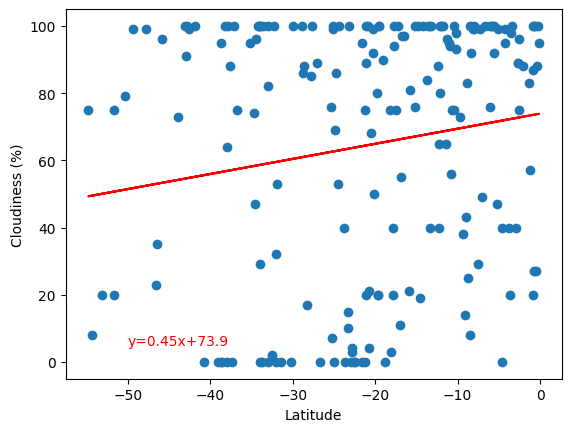

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness (%)"
x_text = -50
y_text = 5
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linear_fig(slope,x_values,intercept,rvalue,y_values,x_label,y_label,x_text,y_text)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08668828319724864


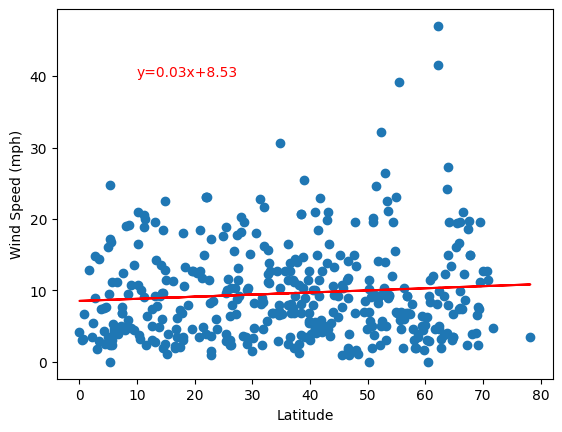

In [96]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed (mph)"
x_text = 10
y_text = 40
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linear_fig(slope,x_values,intercept,rvalue,y_values,x_label,y_label,x_text,y_text)

The r-value is: -0.40438594554078866


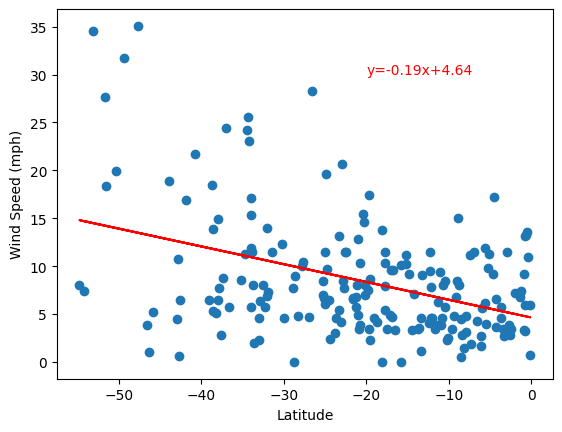

In [99]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed (mph)"
x_text = -20
y_text = 30
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linear_fig(slope,x_values,intercept,rvalue,y_values,x_label,y_label,x_text,y_text)

**Discussion about the linear relationship:** YOUR RESPONSE HERE